INGABIRE JOSELYNE

# Programming Assignment-2
The goal of this assingment is to allow you to practice several the following things in Python:
1. Perfoming typical data processing (or preprocessing if you prefer). This includes all the typical data wraning such as creating news variables, combining several datasets and more 
2. Running explolatory data analysis including basic plotting of variables 
3. Perfoming basic inferential statisticals using statsmodels and scipy to run hypythesis testing and build simple statistial or econometric models.

## Datasets 
For this assignment, you will use the following datasets:
### Rwanda Health Indicators
The Excel file was generated by combining multiple CSV files, each containing data on different health indicators for Rwanda, So that each sheet in the file represent one such indicator. See below some of the input files which were used:
- `access-to-health-care_subnational_rwa`
- `child-mortality-rates_subnational_rwa`
- `dhs-mobile_subnational_rwa`

You can download the dataset from [here](https://docs.google.com/spreadsheets/d/1uvTQYS22VfXXo1Hwkm1frFx_bKkLQkcf/edit?usp=share_link&ouid=113302179168925233984&rtpof=true&sd=true).
### Nights lights Data
- Please download it [here](https://drive.google.com/file/d/1f_4fiqxIejly0YmC088s9bxOfrABv9Sz/view?usp=sharing) and check the documentation in the cells below. 

### Popupation Dataset
- Please download it [here](https://drive.google.com/file/d/1FWEFGdN-xDuFH1jmt0hr4F8Xc3Y5XzvB/view?usp=share_link) and check the documentation and metadata in the class notebooks.


## Submission Guidelines 
- Please guidelines and complete all steps in the [GitHub Workflow](https://dmatekenya.github.io/AIMS-DSCBI/course-requirements/github-workflow.html)
- Once you have completed your assignment, push chanegs to your repository.
- Send a link (copy from within GitHub) to your notebook to the tutors/teaching assistants


# Import Required Packages

In [8]:
from pathlib import Path
import pandas as pd

# Setup Input Folders

As usual, it is good practice to set up input folders using the [`pathlib`](https://docs.python.org/3/library/pathlib.html) package. In this section, make sure to define the folders where your data is stored on your machine.

I find it helpful to set up the working directory and input data folders right at the start of the notebook. To keep things organized, I use the naming convention: `FILE_{NAME}` for files and `DIR_{NAME}` for folders. We use capital letters because these are global variables that will be referenced throughout the notebook.

We'll be using the [`pathlib`](https://docs.python.org/3/library/pathlib.html) library, which offers several advantages over traditional string-based path handling:

- **Cross-platform compatibility** - automatically handles path separators (`/` vs `\`) across different operating systems
- **Object-oriented approach** - paths are objects with useful methods rather than strings
- **Intuitive syntax** - use `/` operator to join paths naturally: `parent_dir / "subfolder" / "file.txt"`
- **Built-in path operations** - methods like `.exists()`, `.is_file()`, `.parent`, `.stem`, and `.suffix`
- **Safer path manipulation** - reduces errors from manual string concatenation and splitting

This is the recommended approach for managing file paths in modern Python development.


In [9]:
# Uncomment the following lines and add your code to define the directories and files
DIR_DATA = Path.cwd().parents[1].joinpath("data")
FILE_EXCEL = DIR_DATA/"RW-Health-Data.xlsx"

# Population by enumeration area (EA) for Malawi
# FILE_POP_MW = ADD YOUR CODE



In [10]:
# my code to define directories and files#
DIR_DATA = Path.cwd().parents[1].joinpath("data")
FILE_EXCEL = DIR_DATA/"RW-Health-Data.xlsx"
FILE_POP_MW = DIR_DATA/r"C:\Users\METEO\AIMS-DSCBI\data\malawi-2018-population.csv"



# Part 1: Processing Excel Files
The primary goal is to preprocess an [Excel file](https://docs.google.com/spreadsheets/d/1uvTQYS22VfXXo1Hwkm1frFx_bKkLQkcf/edit?usp=share_link&ouid=113302179168925233984&rtpof=true&sd=true) with multiple sheets into a unified CSV dataset that consolidates multiple indicators. Having all indicators in a single file at the same analytical unit (national, subnational) is more efficient than managing separate files and enables easier cross-indicator analysis.

## Task 1: Generate National-Level Summaries

For each indicator, compute a single national-level value using appropriate aggregation functions such as **mean**, **sum** or **count**. For this one, all available indicators can be summarized at national level, so we will have a CSV file with one row and 

### Expected Output Structure
1. **DataFrame display** in Jupyter Notebook
2. **CSV file** with columns:
- `indicator_name`: Name of the indicator
- `aggregated_value`: Computed national value
- `indicator_year`: Survey year or something similar
- `survey_name`: Name of the survey where information is coming from
- `aggregation_method`: Statistical method used (optional)

## Task 2: Subnational-Level Indicator Dataset

Create a merged dataset for indicators with subnational data (ADM2/ADM3 levels), ensuring spatial alignment and consistent administrative boundaries.

### Expected Output Structure
   - `indicator_name`: Name of the indicator
   - `aggregated_value`: Computed national value
   - `indicator_year`: Survey year or something similar
   - `survey_name`: Name of the survey where information is coming from
   - `aggregation_method`: Statistical method used (optional)

This structure enables both single-indicator and multi-indicator analysis at the subnational level.

In [268]:
pip install  openpyxl

Note: you may need to restart the kernel to use updated packages.


In [269]:
 pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


PART 1

In [270]:
# Load all sheets from excel
file_path = r"C:\Users\METEO\AIMS-DSCBI\data\RW-Health-Data.xlsx"
xls = pd.ExcelFile(r"C:\Users\METEO\AIMS-DSCBI\data\RW-Health-Data.xlsx")


In [271]:
# see all sheets names
print(xls.sheet_names)


['dhs-mobile_subnational_rwa', 'access-to-health-care_subnation', 'child-mortality-rates_subnation', 'covid-19-prevention_subnational', 'dhs-quickstats_subnational_rwa', 'fertility-rates_subnational_rwa', 'health-insurance_subnational_rw', 'immunization_subnational_rwa', 'mens-fertility-and-family-plann', 'symptoms-of-acute-respiratory-i']


In [272]:
# choose needed sheets in excel file
selected_sheets = ['dhs-mobile_subnational_rwa', 'access-to-health-care_subnation', 'child-mortality-rates_subnation']


In [273]:
# read the selected sheets
sheets = pd.read_excel(file_path, sheet_name=selected_sheets)

In [274]:
# check if the selected sheets have the same number of columns and rows
for name, df in sheets.items():
    print(f"📑 Sheet: {name}")
    print(f"   → Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print(f"   → Column names: {list(df.columns)}\n")

📑 Sheet: dhs-mobile_subnational_rwa
   → Rows: 5765, Columns: 30
   → Column names: ['ISO3', 'Location', 'DataId', 'Indicator', 'Value', 'Precision', 'DHS_CountryCode', 'CountryName', 'SurveyYear', 'SurveyId', 'IndicatorId', 'IndicatorOrder', 'IndicatorType', 'CharacteristicId', 'CharacteristicOrder', 'CharacteristicCategory', 'CharacteristicLabel', 'ByVariableId', 'ByVariableLabel', 'IsTotal', 'IsPreferred', 'SDRID', 'RegionId', 'SurveyYearLabel', 'SurveyType', 'DenominatorWeighted', 'DenominatorUnweighted', 'CILow', 'CIHigh', 'LevelRank']

📑 Sheet: access-to-health-care_subnation
   → Rows: 8524, Columns: 30
   → Column names: ['ISO3', 'Location', 'DataId', 'Indicator', 'Value', 'Precision', 'DHS_CountryCode', 'CountryName', 'SurveyYear', 'SurveyId', 'IndicatorId', 'IndicatorOrder', 'IndicatorType', 'CharacteristicId', 'CharacteristicOrder', 'CharacteristicCategory', 'CharacteristicLabel', 'ByVariableId', 'ByVariableLabel', 'IsTotal', 'IsPreferred', 'SDRID', 'RegionId', 'SurveyYearLa

In [275]:
# a.check names

for name, df in sheets.items():
    print(f"\n📑 Sheet: {name}")


📑 Sheet: dhs-mobile_subnational_rwa

📑 Sheet: access-to-health-care_subnation

📑 Sheet: child-mortality-rates_subnation


In [276]:
# b. check Columns
print(" → Columns:", list(df.columns))

 → Columns: ['ISO3', 'Location', 'DataId', 'Indicator', 'Value', 'Precision', 'DHS_CountryCode', 'CountryName', 'SurveyYear', 'SurveyId', 'IndicatorId', 'IndicatorOrder', 'IndicatorType', 'CharacteristicId', 'CharacteristicOrder', 'CharacteristicCategory', 'CharacteristicLabel', 'ByVariableId', 'ByVariableLabel', 'IsTotal', 'IsPreferred', 'SDRID', 'RegionId', 'SurveyYearLabel', 'SurveyType', 'DenominatorWeighted', 'DenominatorUnweighted', 'CILow', 'CIHigh', 'LevelRank']


In [277]:
# check whether column and row have the same structure
column_sets = {}

for name, df in sheets.items():
    print(f" Sheet: {name}")
    print(f"   → Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print(f"   → First 5 columns: {list(df.columns[:5])}")
    column_sets[name] = set(df.columns)   # <-- store unique column names here
    print()

 Sheet: dhs-mobile_subnational_rwa
   → Rows: 5765, Columns: 30
   → First 5 columns: ['ISO3', 'Location', 'DataId', 'Indicator', 'Value']

 Sheet: access-to-health-care_subnation
   → Rows: 8524, Columns: 30
   → First 5 columns: ['ISO3', 'Location', 'DataId', 'Indicator', 'Value']

 Sheet: child-mortality-rates_subnation
   → Rows: 466, Columns: 30
   → First 5 columns: ['ISO3', 'Location', 'DataId', 'Indicator', 'Value']



In [278]:
#check if all column are matched
common_cols = set.intersection(*column_sets.values())
print(f" Common columns across all sheets ({len(common_cols)}):\n{sorted(list(common_cols))}\n")

for name, cols in column_sets.items():
    extra = cols - common_cols
    missing = common_cols - cols
    if extra or missing:
        print(f" Sheet {name} has differences:")
        if extra:
            print(f"   → Extra columns: {extra}")
        if missing:
            print(f"   → Missing columns: {missing}")
    else:
        print(f" Sheet {name} matches perfectly with the others.\n")

 Common columns across all sheets (30):
['ByVariableId', 'ByVariableLabel', 'CIHigh', 'CILow', 'CharacteristicCategory', 'CharacteristicId', 'CharacteristicLabel', 'CharacteristicOrder', 'CountryName', 'DHS_CountryCode', 'DataId', 'DenominatorUnweighted', 'DenominatorWeighted', 'ISO3', 'Indicator', 'IndicatorId', 'IndicatorOrder', 'IndicatorType', 'IsPreferred', 'IsTotal', 'LevelRank', 'Location', 'Precision', 'RegionId', 'SDRID', 'SurveyId', 'SurveyType', 'SurveyYear', 'SurveyYearLabel', 'Value']

 Sheet dhs-mobile_subnational_rwa matches perfectly with the others.

 Sheet access-to-health-care_subnation matches perfectly with the others.

 Sheet child-mortality-rates_subnation matches perfectly with the others.



In [279]:
# check wether there are Duplicated rows based on key columns
key_cols = ['ISO3', 'Location', 'SurveyYear', 'Indicator', 'CharacteristicLabel']
dup_key_count = df.duplicated(subset=key_cols).sum()
print(f" → Duplicate rows (key columns): {dup_key_count}")

 → Duplicate rows (key columns): 0


In [280]:
# data types
print(" → Data types:\n", df.dtypes)


 → Data types:
 ISO3                       object
Location                   object
DataId                     object
Indicator                  object
Value                      object
Precision                  object
DHS_CountryCode            object
CountryName                object
SurveyYear                 object
SurveyId                   object
IndicatorId                object
IndicatorOrder            float64
IndicatorType              object
CharacteristicId          float64
CharacteristicOrder       float64
CharacteristicCategory     object
CharacteristicLabel        object
ByVariableId               object
ByVariableLabel            object
IsTotal                   float64
IsPreferred               float64
SDRID                      object
RegionId                   object
SurveyYearLabel            object
SurveyType                 object
DenominatorWeighted       float64
DenominatorUnweighted     float64
CILow                     float64
CIHigh                    float6

In [281]:
 # c. Missing values
print(" → Missing values:\n", df.isna().sum())

 → Missing values:
 ISO3                        0
Location                    0
DataId                      0
Indicator                   0
Value                       0
Precision                   0
DHS_CountryCode             1
CountryName                 0
SurveyYear                  0
SurveyId                    0
IndicatorId                 0
IndicatorOrder              1
IndicatorType               1
CharacteristicId            1
CharacteristicOrder         1
CharacteristicCategory      1
CharacteristicLabel         1
ByVariableId                0
ByVariableLabel           185
IsTotal                     1
IsPreferred                 1
SDRID                       1
RegionId                    1
SurveyYearLabel             1
SurveyType                  1
DenominatorWeighted       392
DenominatorUnweighted     392
CILow                     186
CIHigh                    186
LevelRank                  96
dtype: int64


In [282]:
 # d. Duplicated rows (all columns)
dup_count = df.duplicated().sum()
print(f" → Duplicate rows (all columns): {dup_count}")

 → Duplicate rows (all columns): 0


In [283]:
#  Assign individual DataFrames for easier merging
df1 = sheets['dhs-mobile_subnational_rwa']
df2 = sheets['access-to-health-care_subnation']
df3 = sheets['child-mortality-rates_subnation']

In [284]:
# Merge sheets using outer join (keeps all rows)
final_df = pd.merge(df1, df2, on=key_cols, how='outer', suffixes=('_dhs', '_access'))
final_df = pd.merge(final_df, df3, on=key_cols, how='outer', suffixes=('', '_mortality'))

In [285]:
# Check for duplicate rows based on key columns
duplicates = final_df.duplicated(subset=key_cols, keep=False)
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 11239


In [286]:
# Optionally remove duplicates, keeping the first occurrence
final_df = final_df.drop_duplicates(subset=key_cols, keep='first')

In [288]:
#  Save the final clean dataset to CSV
output_path = r"C:\Users\METEO\AIMS-DSCBI\data\merged_health_data.csv"
final_df.to_csv(output_path, index=False)
print(" Merged dataset saved successfully to:", output_path)
print("Shape of final dataset:", final_df.shape)

 Merged dataset saved successfully to: C:\Users\METEO\AIMS-DSCBI\data\merged_health_data.csv
Shape of final dataset: (7300, 80)


## Introduction to Nightlights Dataset

## What is Nightlight Data?

Nightlight data is satellite imagery capturing artificial light emissions from Earth's surface during nighttime. Satellites like VIIRS collect this data regularly, providing an **objective, real-time measure of human economic activity and development**.

### Raw Data: Radiance Measurements
The fundamental measurement in nightlight data is **radiance** - the amount of light energy detected by satellite sensors, measured in **nanowatts per square centimeter per steradian (nW/cm²/sr)**. Each pixel in satellite imagery contains a radiance value representing the light intensity from that specific location on Earth's surface.

### Annual Composite Generation
This dataset was created from **annual composite images** using VIIRS nightlight files for Rwanda. Annual composites are generated by:

- **Aggregating daily/monthly observations** throughout each year (2015, 2020, 2024)
- **Filtering out temporary light sources** (fires, lightning, aurora)
- **Removing cloud-affected observations** to ensure clear measurements
- **Averaging or taking median values** to create stable, representative annual measurements
- **Masking techniques** to exclude areas with unreliable data

The files used include both **average composites** (`average_masked`) and **median composites** (`median_masked`), with **cloud-free versions** (`vcmslcfg`) preferred over cloud-inclusive versions (`vcmcfg`) for more accurate measurements.

### Why Use Nightlight Data?

- **Consistent global coverage** - Available everywhere, regardless of local data quality
- **Real-time updates** - More current than traditional economic statistics
- **Objective measurement** - Not subject to reporting biases
- **High resolution** - Captures local development patterns
- **Proxy for development** - Light intensity correlates with economic activity, infrastructure, and quality of life

## Dataset Overview 

- **6,507 observations** across Rwanda's administrative cells
- **Three time periods**: 2015, 2020, 2024
- **Cell-level data** - Rwanda's smallest administrative units
- Allows temporal analysis of development trends

---

## Variable Definitions

### Administrative Identifiers
- **`cell_id`** - Unique identifier for linking with other datasets
- **`province_name`** - Province (5 total in Rwanda)
- **`district_name`** - District (30 total in Rwanda) 
- **`sector_name`** - Administrative level between district and cell
- **`cell_name`** - Specific cell name

### Core Nightlight Measurements

#### `total_nightlight`
- **Sum of all radiance values** within cell boundaries
- **Key indicator** of overall economic activity/development
- Higher values = more total development

#### `mean_nightlight` 
- **Average radiance** per pixel
- Indicates development intensity regardless of cell size
- Useful for comparing cells of different areas

#### `median_nightlight`
- **Middle radiance value** of all pixels (less sensitive to outliers)
- Better represents typical lighting in unevenly developed areas

#### `max_nightlight`
- **Highest radiance** within cell
- Indicates major infrastructure (hospitals, commercial centers)

#### `min_nightlight` & `std_nightlight`
- Minimum radiance and standard deviation
- High std = uneven development within cell

### Spatial Coverage Indicators

#### `pixel_count`
- **Total pixels** in cell (indicates geographic size)
- Used to normalize other measurements

#### `lit_pixel_count`
- **Number of pixels with detectable light** (radiance > 0)
- Shows spatial extent of development

#### `lit_pixel_percentage`
- **Percentage of cell area with lighting**
- Formula: `(lit_pixel_count ÷ pixel_count) × 100`
- **0% = completely dark, 100% = fully developed**

#### `year`
- Time period: 2015, 2020, or 2024

# Part-2: Demographic and Nightlights Data

## Part A: Varible Generation and Data Integration

### Population Dataset Variables (`rwa-cell-pop.csv`):
Create the following derived variables:
- **`dependency_ratio`** - `(children_under_five_2020 + elderly_60_plus_2020) / working_age_population * 100`
- **`people_per_building`** - `general_2020 / building_count`
- **`working_age_population`** - `general_2020 - children_under_five_2020 - elderly_60_plus_2020`
- **`infrastructure_index`** - Your own formula that incorporates `people_per_building` and other relevant variables to measure infrastructure adequacy. Document and justify your `infrastructure_index` methodology, explaining how `people_per_building` and other variables contribute to measuring infrastructure pressure.

### Nightlight Dataset Variables (`cell-ntl-2015-2020-2024.csv`):
Create the following temporal and development indicators:
- **`nightlight_change_2015_2024`** - Percentage change in total nightlight from 2015 to 2024
- **`mean_nightlight_change_2015_2024`** - Percentage change in mean nightlight from 2015 to 2024
- **`lit_pixel_percentage`** - Use existing or calculate: `(lit_pixel_count / pixel_count) * 100`

### Data Integration:
Merge the datasets using the appropriate column. 

## Part B: Exploratory Data Analysis

### Correlation Analysis:
1. **Correlation Heatmap**: Create a heatmap showing correlations between 10 key variables (mix of demographic, infrastructure, and nightlight variables). 
2. **Report the top 3 variable pairs** with the highest correlations and interpret their relationships.
3. **Identify unexpected correlations** and discuss potential explanations.

### Nightlight Trend Analysis:
1. **District Ranking**: Report the **top 5 districts** with the highest nightlight growth (2015-2024) and **bottom 5 districts** with the most decline or lowest growth.
2. **Lit Pixel Analysis**: Compare these districts using `lit_pixel_percentage` changes to understand whether growth represents intensification or spatial expansion.
3. **Create visualizations** showing nightlight trends for these extreme districts.

## Part C: Modeling

### Multivariate Linear Regression:
1. **Model Development**: Build a multivariate linear regression model predicting **population density** using both demographic and nightlight variables as predictors. Explore as many variables as possible at the beginning.
2. **Variable Selection**: Test different combinations of variables and report the **top 3 most predictive variables** of population density.
3. **Model Evaluation**: Report R-squared, coefficients, and statistical significance. Interpret what these results tell us about population-infrastructure relationships.



## Notes and Other Requirements
Please follow the genral guidelines below when preparing your analysis..

### Statistical Analysis:
- Properly handle missing data and outliers
- Use appropriate statistical tests and report p-values
- Calculate and interpret correlation coefficients
- Validate regression assumptions (normality, homoscedasticity)

### Data Management:
- Document all data cleaning and aggregation steps using markdown 
- Ensure consistent district naming across datasets

### Visualization Standards:
- Create clear, publication-quality heatmaps with appropriate color scales
- Design effective time series plots for nightlight trends
- Include proper axis labels, titles, and legends
- Use consistent formatting across all visualizations

### Reporting Requirements:
- Clearly state the top 3 most predictive variables with statistical justification
- Provide ranked lists for nightlight growth districts with supporting metrics
- Include model performance statistics and interpretation
- Document all methodological choices and assumptions

In [98]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

In [151]:
# directories and files
DIR_DATA = Path.cwd().parents[1].joinpath("data")
FILE_CSV = DIR_DATA/"rwa-cell-pop.csv"



In [153]:
df= pd.read_csv(DIR_DATA/"rwa-cell-pop.csv")

In [154]:
# chech column of dataset
print(df.head())

         cell_id province_name district_name sector_name cell_name  \
0  RWA.1.1.1.1_1  Amajyaruguru        Burera      Bungwe    Bungwe   
1  RWA.1.1.1.2_1  Amajyaruguru        Burera      Bungwe  Bushenya   
2  RWA.1.1.1.3_1  Amajyaruguru        Burera      Bungwe  Mudugari   
3  RWA.1.1.1.4_1  Amajyaruguru        Burera      Bungwe     Tumba   
4  RWA.1.1.2.1_1  Amajyaruguru        Burera      Butaro   Gatsibo   

   elderly_60_plus_2020  general_2020  children_under_five_2020  \
0            241.693282   3855.623385                495.422606   
1            229.611624   3669.128833                470.655098   
2            109.718616   1756.630395                225.188715   
3            318.065743   5174.177333                666.434701   
4            335.976866   6046.478580                833.994018   

   youth_15_24_2020     men_2020   women_2020  building_count  
0        758.093936  1850.711053  2004.912332          1435.0  
1        720.896415  1761.457437  1907.671396   

In [155]:
# 1. creating varible Working Age group
df['working_age_population'] = df['general_2020'] - df['children_under_five_2020'] - df['elderly_60_plus_2020']

# Check result
print(df[['general_2020','children_under_five_2020','elderly_60_plus_2020','working_age_population']])

      general_2020  children_under_five_2020  elderly_60_plus_2020  \
0      3855.623385                495.422606            241.693282   
1      3669.128833                470.655098            229.611624   
2      1756.630395                225.188715            109.718616   
3      5174.177333                666.434701            318.065743   
4      6046.478580                833.994018            335.976866   
...            ...                       ...                   ...   
2164   2039.157785                243.697240             48.552254   
2165   2946.948206                277.871858             84.206886   
2166   2864.605386                272.256440             82.784593   
2167   2913.380392                298.982254             81.618488   
2168   2285.696907                279.887387             56.925037   

      working_age_population  
0                3118.507497  
1                2968.862111  
2                1421.723064  
3                4189.676889  
4   

In [156]:
# creating depencency ratio variable
df['dependency_ratio'] = (df['children_under_five_2020'] + df['elderly_60_plus_2020']) / (df['working_age_population'] * 100)

# View the result
print(df[['children_under_five_2020','elderly_60_plus_2020','working_age_population','dependency_ratio']])

      children_under_five_2020  elderly_60_plus_2020  working_age_population  \
0                   495.422606            241.693282             3118.507497   
1                   470.655098            229.611624             2968.862111   
2                   225.188715            109.718616             1421.723064   
3                   666.434701            318.065743             4189.676889   
4                   833.994018            335.976866             4876.507696   
...                        ...                   ...                     ...   
2164                243.697240             48.552254             1746.908291   
2165                277.871858             84.206886             2584.869462   
2166                272.256440             82.784593             2509.564353   
2167                298.982254             81.618488             2532.779650   
2168                279.887387             56.925037             1948.884483   

      dependency_ratio  
0             

In [157]:
# creating people_per_building variable
df["people_per_building"]=df["general_2020"] /df["building_count"]
print (df[["general_2020","building_count","people_per_building"]])

      general_2020  building_count  people_per_building
0      3855.623385          1435.0             2.686846
1      3669.128833           884.0             4.150598
2      1756.630395           530.0             3.314397
3      5174.177333          1512.0             3.422075
4      6046.478580          2036.0             2.969783
...            ...             ...                  ...
2164   2039.157785           599.0             3.404270
2165   2946.948206           590.0             4.994827
2166   2864.605386           493.0             5.810559
2167   2913.380392           974.0             2.991150
2168   2285.696907           415.0             5.507703

[2169 rows x 3 columns]


# Methodology used to calculate infrastructures index are:

The Infrastructure Index measures infrastructure adequacy by combining 
. positive factors (buildings per capita, working-age population) 
. negative pressures (dependency ratio, people per building).
 Each factor is normalized, and the final index—ranging from 0 (weak) to 1 (strong)—reflects the balance between infrastructure availability and population demand.
 
Dependency ratio: higher children+elderly per working-age → more pressure → normalized inversely.

Buildings per capita: more buildings per person → better infrastructure.

People per building: high occupancy → negative contribution → normalized inversely.

Final index: average of normalized components (range 0–1).


In [163]:
# Step 1: Compute buildings per capita (positive contribution)
df['buildings_per_capita'] = df['building_count'] / (
    df['working_age_population'] + df['children_under_five_2020'] + df['elderly_60_plus_2020']
)

# Step 2: Normalize columns for index calculation
df['dependency_norm'] = 1 - (df['dependency_ratio'] - df['dependency_ratio'].min()) / (df['dependency_ratio'].max() - df['dependency_ratio'].min())
df['buildings_norm'] = (df['buildings_per_capita'] - df['buildings_per_capita'].min()) / (df['buildings_per_capita'].max() - df['buildings_per_capita'].min())
df['people_per_building_norm'] = 1 - (df['people_per_building'] - df['people_per_building'].min()) / (df['people_per_building'].max() - df['people_per_building'].min())

# Step 3: Compute simplified Infrastructure Index
df['infrastructure_index'] = (df['dependency_norm'] + df['buildings_norm'] + df['people_per_building_norm']) / 3

# Step 4: View results
print(df[['dependency_ratio','buildings_per_capita','people_per_building','infrastructure_index']])

      dependency_ratio  buildings_per_capita  people_per_building  \
0             0.002364              0.372184             2.686846   
1             0.002359              0.240929             4.150598   
2             0.002356              0.301714             3.314397   
3             0.002350              0.292220             3.422075   
4             0.002399              0.336725             2.969783   
...                ...                   ...                  ...   
2164          0.001673              0.293749             3.404270   
2165          0.001401              0.200207             4.994827   
2166          0.001415              0.172100             5.810559   
2167          0.001503              0.334320             2.991150   
2168          0.001728              0.181564             5.507703   

      infrastructure_index  
0                 0.554919  
1                 0.524074  
2                 0.539345  
3                 0.538118  
4                 0.539806

In [167]:
# directories and files
DIR_DATA = Path.cwd().parents[1].joinpath("data")
FILE_CSV = DIR_DATA/"cell-ntl-2015-2020-2024.csv"

In [182]:
df=pd.read_csv(DIR_DATA/"cell-ntl-2015-2020-2024.csv")
print(df.head())

         cell_id     prov_name dist_name sect_name     province_name  \
0  RWA.1.1.1.1_1  Amajyaruguru    Burera    Bungwe  Unknown_Province   
1  RWA.1.1.1.1_1  Amajyaruguru    Burera    Bungwe  Unknown_Province   
2  RWA.1.1.1.1_1  Amajyaruguru    Burera    Bungwe  Unknown_Province   
3  RWA.1.1.1.2_1  Amajyaruguru    Burera    Bungwe  Unknown_Province   
4  RWA.1.1.1.2_1  Amajyaruguru    Burera    Bungwe  Unknown_Province   

      district_name     sector_name cell_name  total_nightlight  \
0  Unknown_District  Unknown_Sector    Bungwe          6.994746   
1  Unknown_District  Unknown_Sector    Bungwe         11.608531   
2  Unknown_District  Unknown_Sector    Bungwe          1.900350   
3  Unknown_District  Unknown_Sector  Bushenya          7.167736   
4  Unknown_District  Unknown_Sector  Bushenya         10.771848   

   mean_nightlight  median_nightlight  max_nightlight  min_nightlight  \
0         0.099925                0.0        0.300291             0.0   
1         0.165836

In [206]:
# Drop unwanted columns which dont have data
df = df.drop(columns=['province_name', 'district_name', 'sector_name'])

print(df.head())

         cell_id     prov_name dist_name sect_name cell_name  \
0  RWA.1.1.1.1_1  Amajyaruguru    Burera    Bungwe    Bungwe   
1  RWA.1.1.1.1_1  Amajyaruguru    Burera    Bungwe    Bungwe   
2  RWA.1.1.1.1_1  Amajyaruguru    Burera    Bungwe    Bungwe   
3  RWA.1.1.1.2_1  Amajyaruguru    Burera    Bungwe  Bushenya   
4  RWA.1.1.1.2_1  Amajyaruguru    Burera    Bungwe  Bushenya   

   total_nightlight  mean_nightlight  median_nightlight  max_nightlight  \
0          6.994746         0.099925                0.0        0.300291   
1         11.608531         0.165836                0.0        0.586523   
2          1.900350         0.027148                0.0        0.142328   
3          7.167736         0.113774                0.0        0.307715   
4         10.771848         0.170982                0.0        0.463222   

   min_nightlight  std_nightlight  pixel_count  lit_pixel_count  year  \
0             0.0        0.130675           70               26  2020   
1             0.0 

In [208]:
# testing missing values
print(df.isnull().sum())

cell_id                     0
prov_name                   0
dist_name                   0
sect_name                   0
cell_name                   0
total_nightlight            0
mean_nightlight             0
median_nightlight           0
max_nightlight              0
min_nightlight              0
std_nightlight              0
pixel_count                 0
lit_pixel_count             0
year                        0
lit_pixel_percentage        0
total_nightlight_outlier    0
dtype: int64


In [209]:
# Detects outliers in my dataset
def detect_outliers_iqr(df, columns):
    """
    Detects outliers in multiple columns using the IQR method.
    
    Parameters:
        df (pd.DataFrame): "cell-ntl-2015-2020-2024.csv"
        columns (list): list of column names to check
    
    Returns:
        df (pd.DataFrame): same dataframe with new outlier flags
    """
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df[f'{col}_outlier'] = (df[col] < lower_bound) | (df[col] > upper_bound)
    
    return df

In [ ]:
# Select the numeric columns you want to check for outliers
numeric_cols = ['total_nightlight', 'mean_nightlight','max_nightlight', 'min_nightlight', 'lit_pixel_percentage']

# Apply function
df = detect_outliers_iqr(df, numeric_cols)

# Check results
print(df[[*numeric_cols, 'total_nightlight_outlier', 'mean_nightlight_outlier','max_nightlight', 'min_nightlight', 'lit_pixel_percentage_outlier']].head())

# Summary of how many outliers per column
for col in numeric_cols:
    print(f"{col}: {df[f'{col}_outlier'].sum()} outliers")

   total_nightlight  mean_nightlight  max_nightlight  min_nightlight  \
0          6.994746         0.099925        0.300291             0.0   
1         11.608531         0.165836        0.586523             0.0   
2          1.900350         0.027148        0.142328             0.0   
3          7.167736         0.113774        0.307715             0.0   
4         10.771848         0.170982        0.463222             0.0   

   lit_pixel_percentage  total_nightlight_outlier  mean_nightlight_outlier  \
0             37.142857                     False                    False   
1             37.142857                     False                    False   
2             37.142857                     False                    False   
3             42.857143                     False                    False   
4             42.857143                     False                    False   

   max_nightlight  min_nightlight  lit_pixel_percentage_outlier  
0        0.300291             0.

My dataset  has many outliers ,i have to change them with the column median which is
less sensitive to outliers 

In [230]:
def replace_outliers_with_median(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    median = series.median()
    return np.where((series < lower) | (series > upper), median, series)
# Apply to your dataset
df['total_nightlight'] = replace_outliers_with_median(df['total_nightlight'])
df['mean_nightlight'] = replace_outliers_with_median(df['mean_nightlight'])
df['max_nightlight'] = replace_outliers_with_median(df['max_nightlight'])
df['lit_pixel_percentage'] = replace_outliers_with_median(df['lit_pixel_percentage'])

# Make a copy of your dataset (so original remains unchanged)
df_cleaned = df.copy()

# Replace outliers column by column
for col in ['total_nightlight', 'mean_nightlight', 'max_nightlight', 'min_nightlight', 'lit_pixel_percentage']:
    df_cleaned[col] = replace_outliers_with_median(df_cleaned[col])

# Now df_cleaned is your new dataset without extreme outliers
print(df_cleaned.head())

# Save cleaned dataset (optional)
df_cleaned.to_csv("nightlight_cleaned.csv", index=False)

         cell_id     prov_name dist_name sect_name cell_name  \
0  RWA.1.1.1.1_1  Amajyaruguru    Burera    Bungwe    Bungwe   
1  RWA.1.1.1.1_1  Amajyaruguru    Burera    Bungwe    Bungwe   
2  RWA.1.1.1.1_1  Amajyaruguru    Burera    Bungwe    Bungwe   
3  RWA.1.1.1.2_1  Amajyaruguru    Burera    Bungwe  Bushenya   
4  RWA.1.1.1.2_1  Amajyaruguru    Burera    Bungwe  Bushenya   

   total_nightlight  mean_nightlight  median_nightlight  max_nightlight  \
0          6.994746         0.099925                0.0        0.300291   
1         11.608531         0.165836                0.0        0.586523   
2          1.900350         0.027148                0.0        0.142328   
3          7.167736         0.113774                0.0        0.307715   
4         10.771848         0.170982                0.0        0.463222   

   min_nightlight  std_nightlight  pixel_count  lit_pixel_count  year  \
0             0.0        0.130675           70               26  2020   
1             0.0 

my dataset  has many outliers ,i have to change them with the column median which is
less sensitive to outliers 'total_nightlight_outlier'

In [231]:
df = df_cleaned.copy()

# Filter for only 2015 and 2024
df_2015 = df[df['year'] == 2015][['cell_id', 'total_nightlight', 'mean_nightlight']]
df_2024 = df[df['year'] == 2024][['cell_id', 'total_nightlight', 'mean_nightlight']]

# Merge 2015 and 2024 data on cell_id
df_change = pd.merge(df_2015, df_2024, on='cell_id', suffixes=('_2015', '_2024'))

# Calculate percentage change
df_change['nightlight_change_2015_2024'] = ((df_change['total_nightlight_2024'] - df_change['total_nightlight_2015']) / df_change['total_nightlight_2015']) * 100
df_change['mean_nightlight_change_2015_2024'] = ((df_change['mean_nightlight_2024'] - df_change['mean_nightlight_2015']) / df_change['mean_nightlight_2015']) * 100

# Merge results back to the main dataset
df_final = df.merge(df_change[['cell_id','nightlight_change_2015_2024','mean_nightlight_change_2015_2024']], on='cell_id', how='left')

df_final.head()

,cell_id,prov_name,dist_name,sect_name,cell_name,total_nightlight,mean_nightlight,median_nightlight,max_nightlight,min_nightlight,...,lit_pixel_count,year,lit_pixel_percentage,total_nightlight_outlier,mean_nightlight_outlier,lit_pixel_percentage_outlier,max_nightlight_outlier,min_nightlight_outlier,nightlight_change_2015_2024,mean_nightlight_change_2015_2024
0,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Bungwe,6.994746,0.099925,0.0,0.300291,0.0,...,26,2020,37.142857,False,False,False,False,False,510.862720,510.862733
1,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Bungwe,11.608531,0.165836,0.0,0.586523,0.0,...,26,2024,37.142857,False,False,False,False,False,510.862720,510.862733
2,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Bungwe,1.900350,0.027148,0.0,0.142328,0.0,...,26,2015,37.142857,False,False,False,False,False,510.862720,510.862733
3,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Bushenya,7.167736,0.113774,0.0,0.307715,0.0,...,27,2020,42.857143,False,False,False,False,False,601.012355,601.012330
4,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Bushenya,10.771848,0.170982,0.0,0.463222,0.0,...,27,2024,42.857143,False,False,False,False,False,601.012355,601.012330


In [233]:
# Calculate percentage change
nightlight_change_2015_2024 = ((nl_2024 - nl_2015) / nl_2015) * 100

print("Nightlight Change (2015–2024):", nightlight_change_2015_2024, "%")

Nightlight Change (2015–2024): 314.06813651443076 %


In [203]:
# Calculate percentage change
nightlight_change_2015_2024 = ((nl_2024 - nl_2015) / nl_2015) * 100

print("Nightlight Change (2015–2024):", nightlight_change_2015_2024, "%")

Nightlight Change (2015–2024): 314.06813651443076 %


In [205]:
# Calculate lit pixel percentage
df['lit_pixel_percentage'] = (df['lit_pixel_count'] / df['pixel_count']) * 100

# Check first few rows
print(df[['cell_id', 'year', 'lit_pixel_count', 'pixel_count', 'lit_pixel_percentage']].head())

         cell_id  year  lit_pixel_count  pixel_count  lit_pixel_percentage
0  RWA.1.1.1.1_1  2020               26           70             37.142857
1  RWA.1.1.1.1_1  2024               26           70             37.142857
2  RWA.1.1.1.1_1  2015               26           70             37.142857
3  RWA.1.1.1.2_1  2020               27           63             42.857143
4  RWA.1.1.1.2_1  2024               27           63             42.857143


In [238]:
# Filter 2015 and 2024 data
df_2015 = df[df['year'] == 2015][['dist_name', 'total_nightlight']]
df_2024 = df[df['year'] == 2024][['dist_name', 'total_nightlight']]

# Aggregate total nightlight by district
district_2015 = df_2015.groupby('dist_name')['total_nightlight'].sum().reset_index()
district_2024 = df_2024.groupby('dist_name')['total_nightlight'].sum().reset_index()

# Merge 2015 and 2024 totals
district_change = pd.merge(district_2015, district_2024, on='dist_name', suffixes=('_2015', '_2024'))

# Calculate percentage change per district
district_change['nightlight_change_2015_2024'] = ((district_change['total_nightlight_2024'] - 
                                                  district_change['total_nightlight_2015']) / 
                                                 district_change['total_nightlight_2015']) * 100

# Top 5 districts with highest growth
top_5_districts = district_change.sort_values(by='nightlight_change_2015_2024', ascending=False).head(5)

# Bottom 5 districts with lowest growth / decline
bottom_5_districts = district_change.sort_values(by='nightlight_change_2015_2024', ascending=True).head(5)

top_5_districts, bottom_5_districts

(    dist_name  total_nightlight_2015  total_nightlight_2024  \
 1      Burera             197.418085            1244.080100   
 5     Gicumbi             409.321934            1916.230757   
 28    Rutsiro             232.963908            1061.365310   
 16  Ngororero             288.038844            1307.492392   
 2     Gakenke             344.385841            1506.906690   
 
     nightlight_change_2015_2024  
 1                    530.175346  
 5                    368.147587  
 28                   355.592164  
 16                   353.929190  
 2                    337.563486  ,
      dist_name  total_nightlight_2015  total_nightlight_2024  \
 11    Kicukiro             691.703996             536.294653   
 22  Nyarugenge             626.780469             666.831972   
 3       Gasabo             839.782383            1189.809921   
 10     Kayonza             515.136502             806.495353   
 0     Bugesera             558.139260            1108.122588   
 
     nightl

In [240]:
# Aggregate lit_pixel_percentage by district for 2015 and 2024
lit_2015 = df[df['year'] == 2015].groupby('dist_name')['lit_pixel_percentage'].mean().reset_index()
lit_2024 = df[df['year'] == 2024].groupby('dist_name')['lit_pixel_percentage'].mean().reset_index()

# Merge 2015 and 2024 data
lit_change = pd.merge(lit_2015, lit_2024, on='dist_name', suffixes=('_2015', '_2024'))

# Calculate percentage change in lit_pixel_percentage
lit_change['lit_pixel_percentage_change'] = ((lit_change['lit_pixel_percentage_2024'] - 
                                              lit_change['lit_pixel_percentage_2015']) / 
                                             lit_change['lit_pixel_percentage_2015']) * 100

# Focus on top 5 and bottom 5 districts from previous analysis
top_bottom_districts = pd.concat([top_5_districts['dist_name'], bottom_5_districts['dist_name']])
lit_change_filtered = lit_change[lit_change['dist_name'].isin(top_bottom_districts)]

lit_change_filtered.sort_values(by='lit_pixel_percentage_change', ascending=False)

,dist_name,lit_pixel_percentage_2015,lit_pixel_percentage_2024,lit_pixel_percentage_change
1,Burera,42.443194,42.584185,0.332187
28,Rutsiro,40.382121,40.432219,0.124062
10,Kayonza,43.488563,43.516501,0.064241
5,Gicumbi,38.880643,38.897026,0.042136
0,Bugesera,43.536071,43.536071,0.000000
3,Gasabo,38.476822,38.476822,0.000000
2,Gakenke,41.522959,41.522959,0.000000
11,Kicukiro,37.146419,37.146419,0.000000
16,Ngororero,41.563864,41.563864,0.000000
22,Nyarugenge,37.318212,37.318212,0.000000


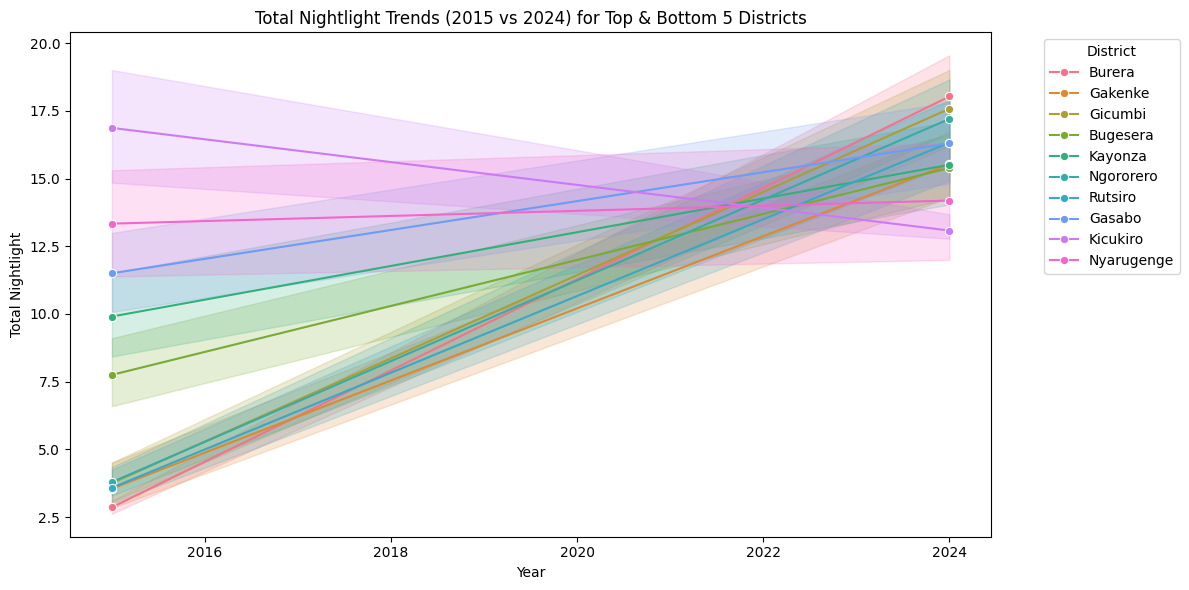

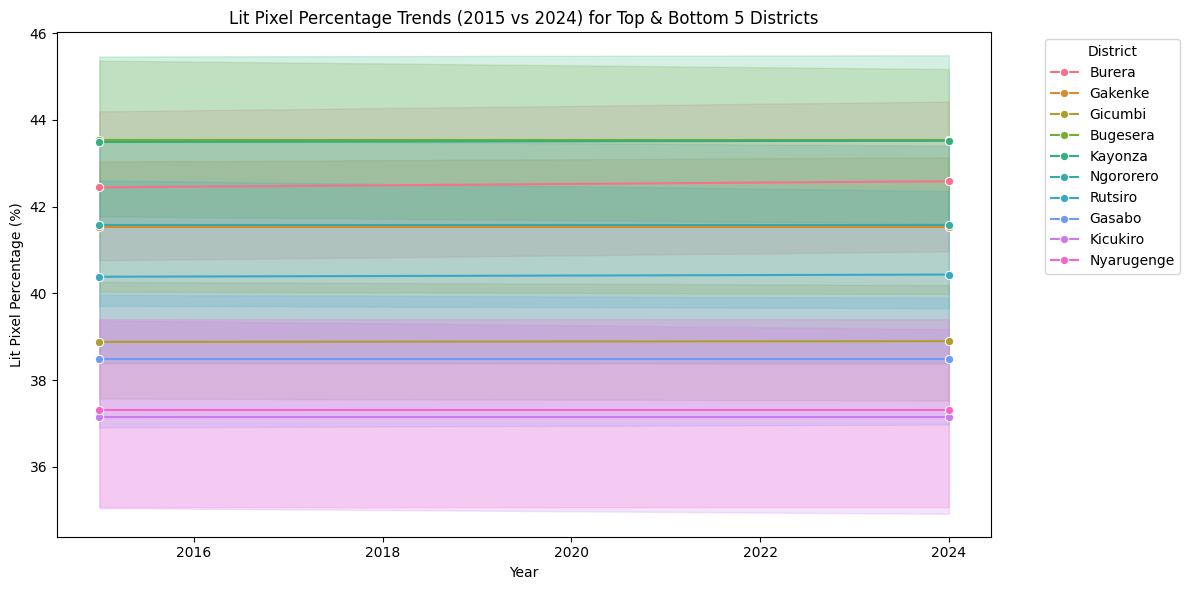

In [241]:
# Select extreme districts
extreme_districts = pd.concat([top_5_districts['dist_name'], bottom_5_districts['dist_name']])

# Filter dataset for these districts and years of interest
df_extreme = df[df['dist_name'].isin(extreme_districts) & df['year'].isin([2015, 2024])]

# Plot total nightlight trends
plt.figure(figsize=(12,6))
sns.lineplot(data=df_extreme, x='year', y='total_nightlight', hue='dist_name', marker='o')
plt.title('Total Nightlight Trends (2015 vs 2024) for Top & Bottom 5 Districts')
plt.ylabel('Total Nightlight')
plt.xlabel('Year')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot lit_pixel_percentage trends
plt.figure(figsize=(12,6))
sns.lineplot(data=df_extreme, x='year', y='lit_pixel_percentage', hue='dist_name', marker='o')
plt.title('Lit Pixel Percentage Trends (2015 vs 2024) for Top & Bottom 5 Districts')
plt.ylabel('Lit Pixel Percentage (%)')
plt.xlabel('Year')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

PART C: Multivariate

In [254]:

# Copy dataset to work on
# data set on nightdata
df_nightlight = df.copy()

# Drop columns not useful for modeling (text or IDs)
df_nightlight = df_nightlight.drop(columns=['cell_id', 'prov_name', 'dist_name', 'sect_name', 'cell_name'])

# Ensure no missing values (simple approach: drop or impute)
df_nightlight = df_nightlight.dropna()  # or use imputation later

# Check the columns we can use as predictors
print(df_nightlight.columns)

Index(['total_nightlight', 'mean_nightlight', 'median_nightlight',
       'max_nightlight', 'min_nightlight', 'std_nightlight', 'pixel_count',
       'lit_pixel_count', 'year', 'lit_pixel_percentage',
       'total_nightlight_outlier', 'mean_nightlight_outlier',
       'lit_pixel_percentage_outlier', 'max_nightlight_outlier',
       'min_nightlight_outlier'],
      dtype='object')


Data set on demography

In [261]:
df_demo =pd.read_csv(r"C:\Users\METEO\AIMS-DSCBI\data\merged_health_data.csv")
print(df_demo.columns)

Index(['ISO3', 'Location', 'DataId_dhs', 'Indicator', 'Value_dhs',
       'Precision_dhs', 'DHS_CountryCode_dhs', 'CountryName_dhs', 'SurveyYear',
       'SurveyId_dhs', 'IndicatorId_dhs', 'IndicatorOrder_dhs',
       'IndicatorType_dhs', 'CharacteristicId_dhs', 'CharacteristicOrder_dhs',
       'CharacteristicCategory_dhs', 'CharacteristicLabel', 'ByVariableId_dhs',
       'ByVariableLabel_dhs', 'IsTotal_dhs', 'IsPreferred_dhs', 'SDRID_dhs',
       'RegionId_dhs', 'SurveyYearLabel_dhs', 'SurveyType_dhs',
       'DenominatorWeighted_dhs', 'DenominatorUnweighted_dhs', 'CILow_dhs',
       'CIHigh_dhs', 'LevelRank_dhs', 'DataId_access', 'Value_access',
       'Precision_access', 'DHS_CountryCode_access', 'CountryName_access',
       'SurveyId_access', 'IndicatorId_access', 'IndicatorOrder_access',
       'IndicatorType_access', 'CharacteristicId_access',
       'CharacteristicOrder_access', 'CharacteristicCategory_access',
       'ByVariableId_access', 'ByVariableLabel_access', 'IsTotal_a

In [259]:
# Keep numeric nightlight features + year (merge key)
nightlight_features = [
    'total_nightlight', 'mean_nightlight', 'median_nightlight',
    'max_nightlight', 'min_nightlight', 'std_nightlight',
    'pixel_count', 'lit_pixel_count', 'lit_pixel_percentage',
    'total_nightlight_outlier', 'mean_nightlight_outlier',
    'lit_pixel_percentage_outlier', 'max_nightlight_outlier', 'min_nightlight_outlier'
]

df_nl_model = df_nightlight[nightlight_features + ['year']]  # only 'year' is used as merge key

In [262]:
# Prepare demographic data for merging
df_demo_model = df_demo[['CountryName', 'SurveyYearLabel', 'Value']].rename(
    columns={'Value': 'population_density', 'SurveyYearLabel': 'year'}
)

In [264]:
df_demo_model = df_demo[['CountryName', 'SurveyYearLabel', 'Value']].rename(
    columns={'Value': 'population_density', 'SurveyYearLabel': 'year'})